# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data import

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Emran Mohammed/Pictures/project/ml-project-unsupervised-learning/Wholesale_Data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Cleaning

In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [27]:
df.shape

(440, 8)

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Data Visualization and Interpretation

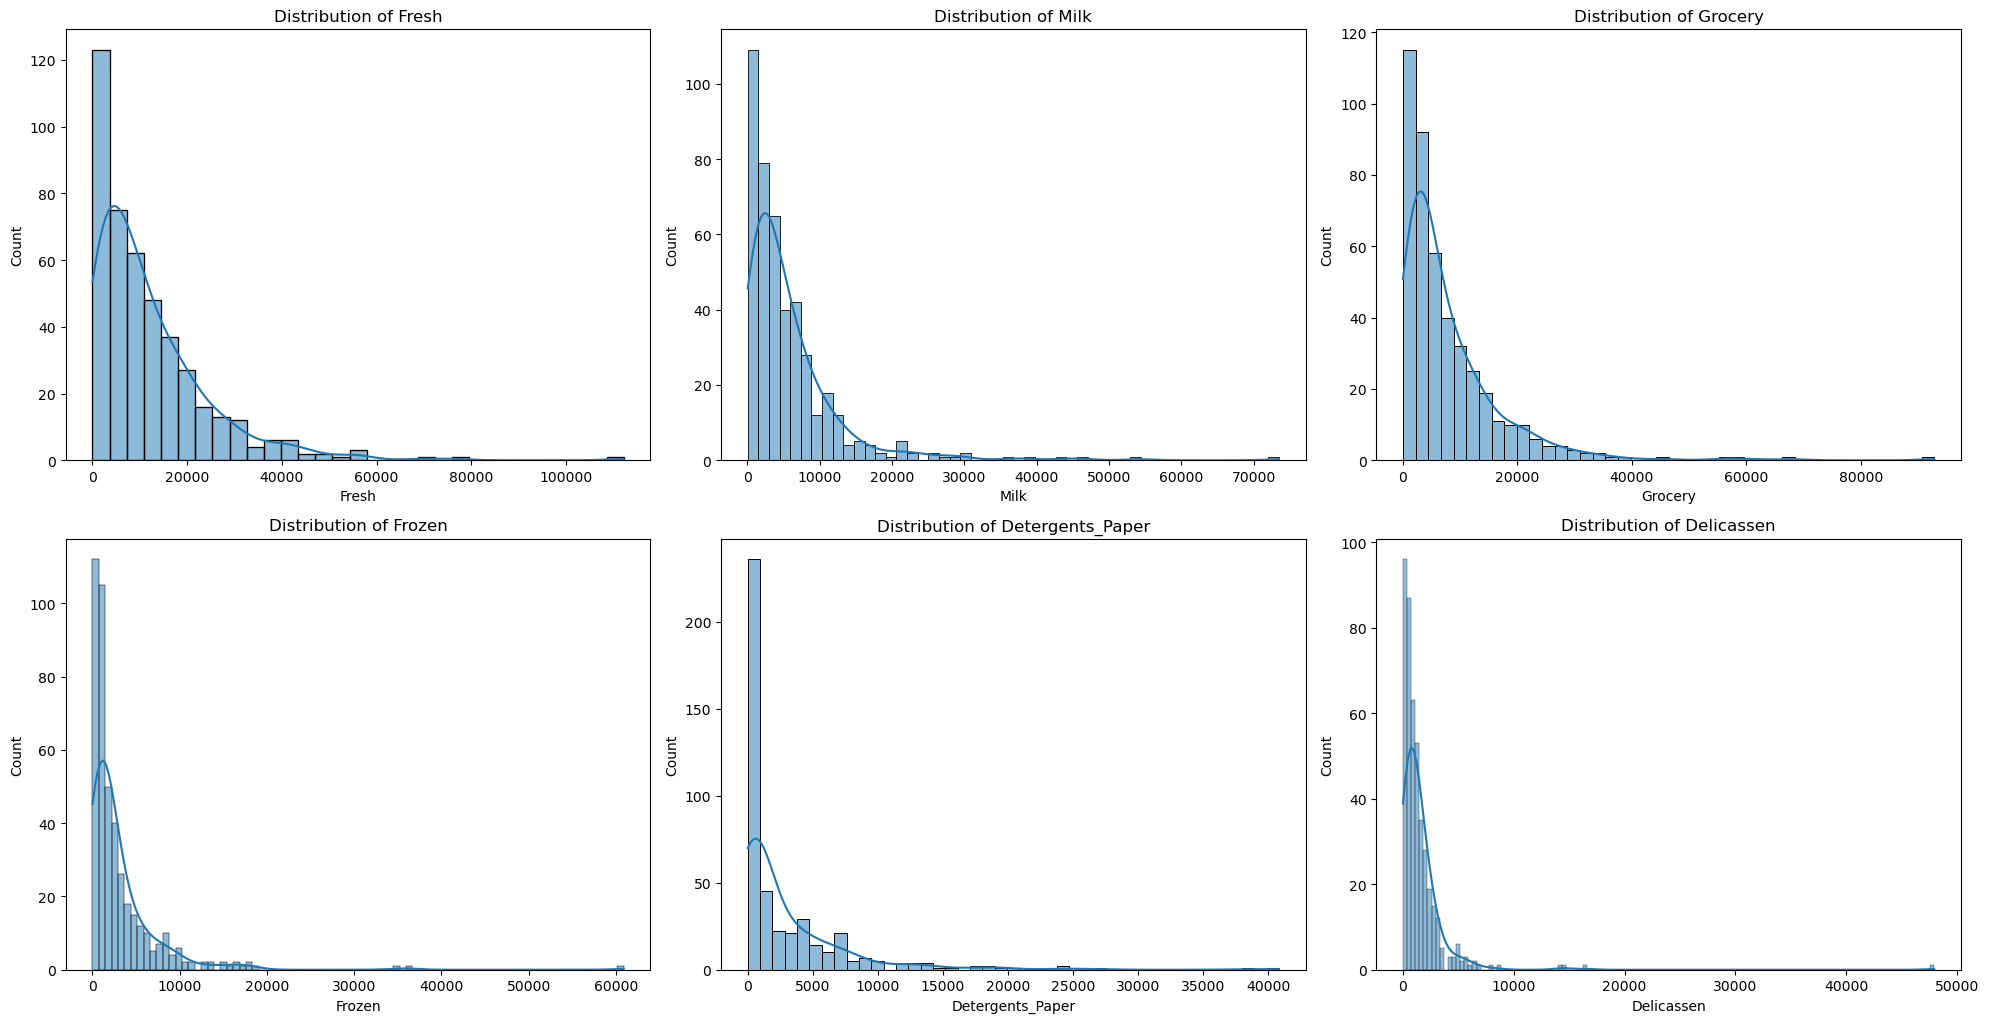

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for index, column in enumerate(df.columns[2:], start=1):
    plt.subplot(3, 3, index)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

# Show the plot
plt.tight_layout()
plt.show()

#### The histograms above show the distributions for each of the product categories in the dataset. Some key observations are:
Most of the distributions are right-skewed, indicating that the majority of the customers spend less with a few spending significantly more.

The 'Fresh', 'Grocery', and 'Milk' categories, in particular, show a heavy right skew.

The 'Frozen', 'Detergents_Paper', and 'Delicassen' categories have a similar pattern but with less pronounced tails.

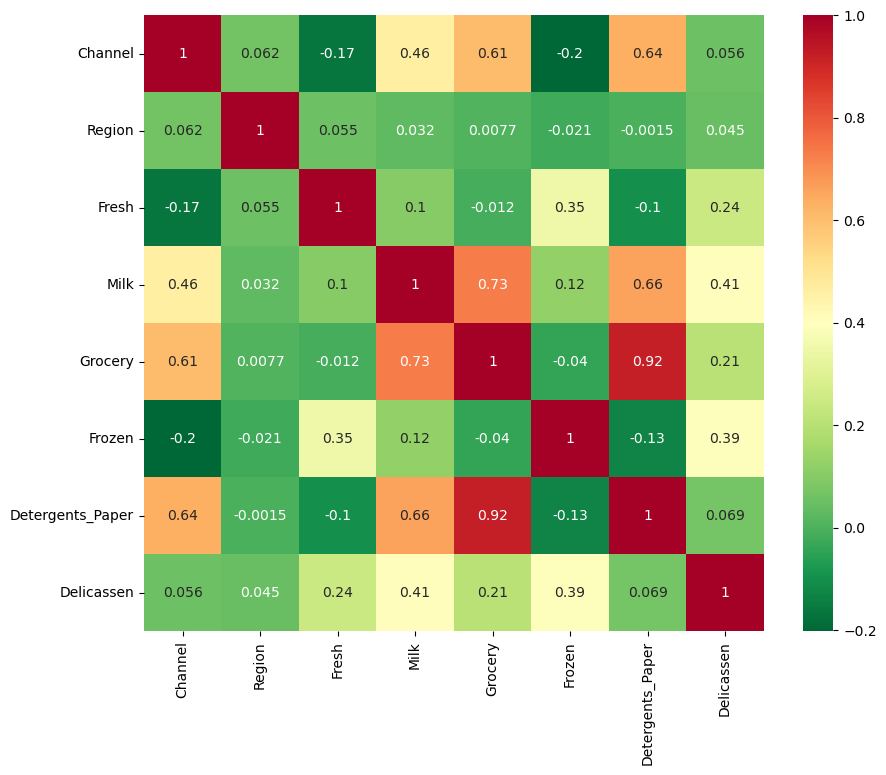

In [17]:
plt.figure(figsize=(10, 8))
cormat = df.corr()
sns.heatmap(cormat, annot=True, cmap="RdYlGn_r")

plt.show()

#### The heatmap displays the correlation between different features:

There is a strong positive correlation between 'Grocery' and 'Detergents_Paper' (0.92), which suggests that customers who spend more on groceries also tend to spend more on detergents and paper products.

'Milk' also shows a moderate to strong correlation with 'Grocery' (0.73) and 'Detergents_Paper' (0.66).

'Fresh' and 'Frozen' categories show very little correlation with other product categories, indicating that spending in these categories is more independent.

C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


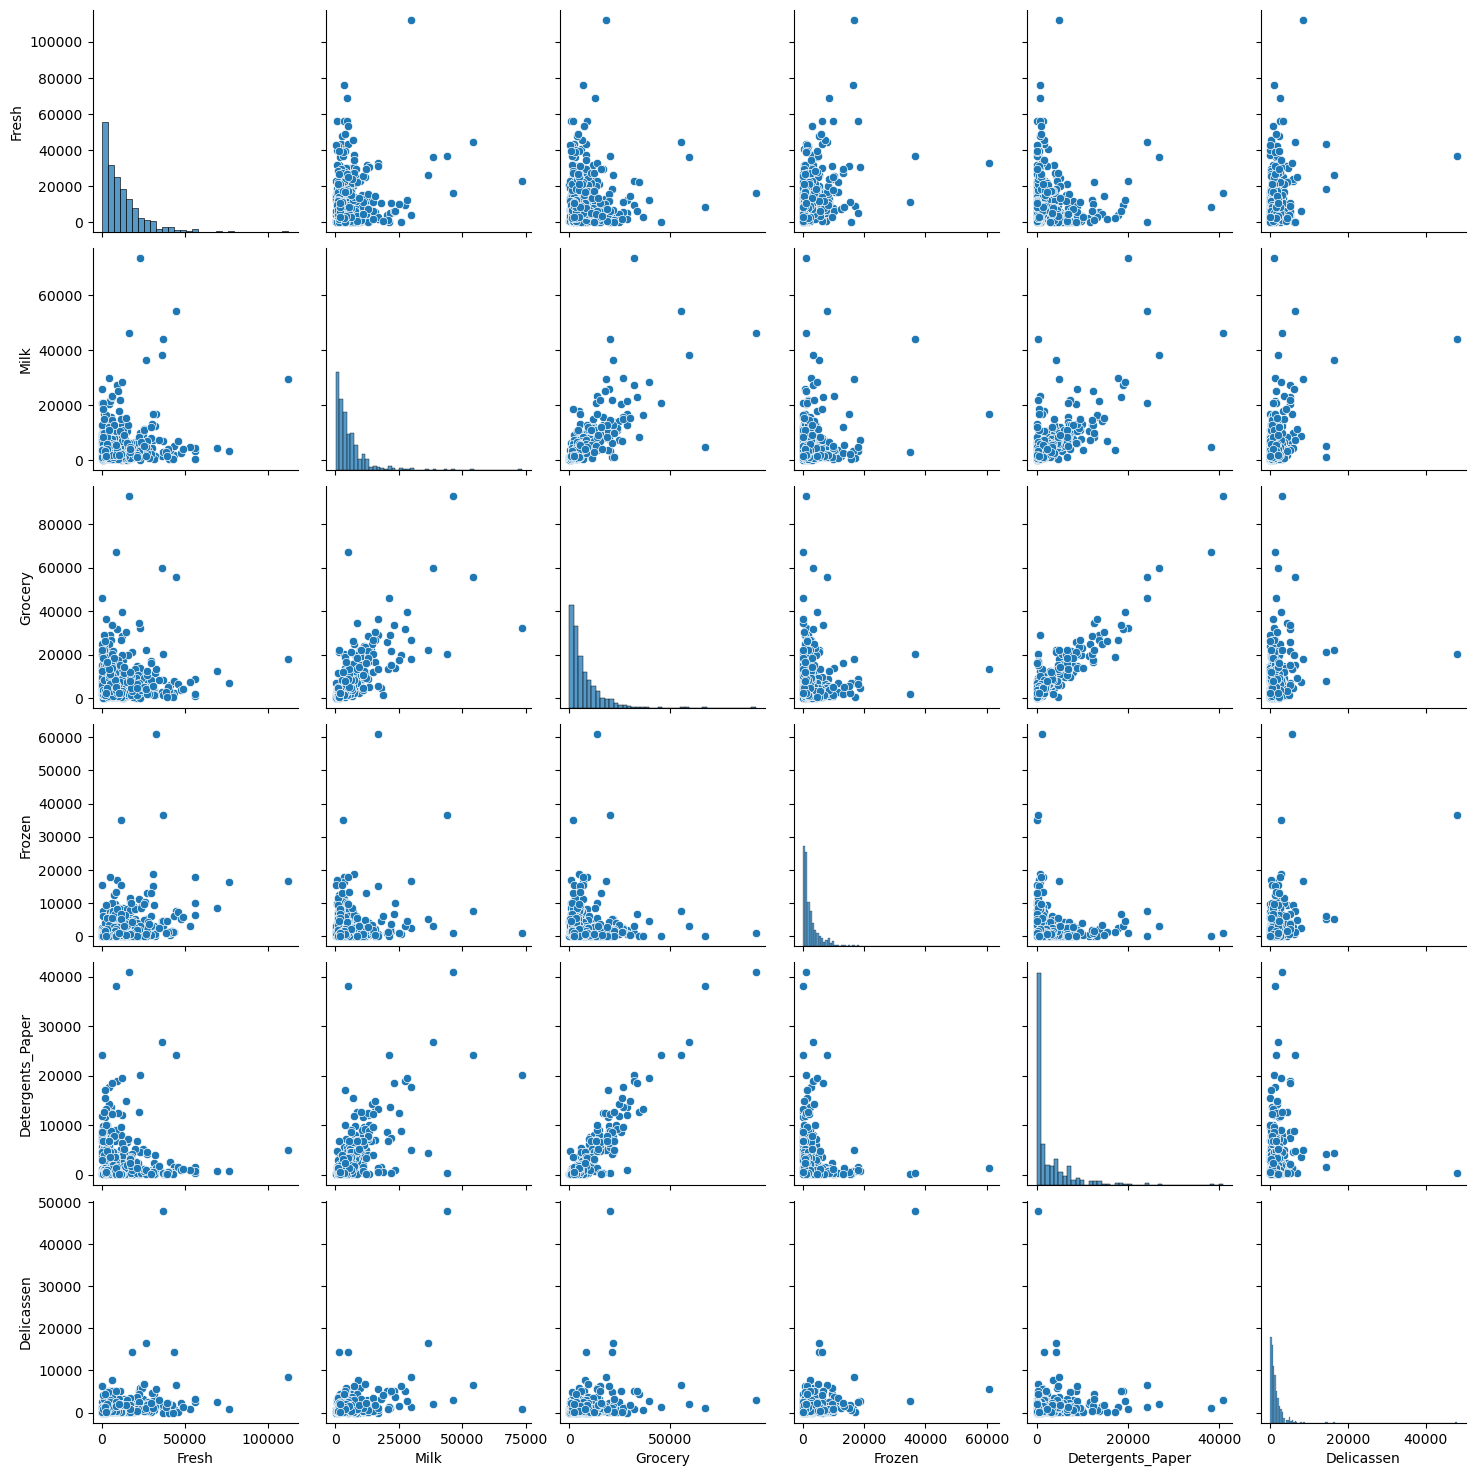

In [20]:
sns.pairplot(df.iloc[:, 2:])

#### From the above pairplot we can understand the following:
Milk and grocery have a strong direct relation with Detergents_paper and at the same time they have also a direct relation with each other.

I was able to notice that those attributes Delicasen and Frozen have almost no relation with any variable because they don't exhibit any kind of trend in each of their scatter plot



### Removing Outlier

In [4]:
from collections import Counter
import numpy as np

# Re-running the outlier detection with the correct import
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 1)

    return multiple_outliers

outliers_to_remove = detect_outliers(df, df.columns[2:])

# Remove outliers
dff = df.drop(outliers_to_remove, axis=0).reset_index(drop=True)

# Output the number of outliers and the new shape of the dataset without outliers
len(outliers_to_remove), dff.shape


(41, (399, 8))

In [32]:
dff

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
394,1,3,16731,3922,7994,688,2371,838
395,1,3,29703,12051,16027,13135,182,2204
396,1,3,39228,1431,764,4510,93,2346
397,1,3,10290,1981,2232,1038,168,2125


#### We have detected 41 outliers across more than one product category. After removing these outliers from the dataset, out of 440 observation we are left with 399 observations.

### Data Transformation and Feature Selection

In [6]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = dff.iloc[:, 2:]
# Separating out the channel and region for possible use later
channels_regions = dff.iloc[:, :2]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

In [7]:
features_scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.157841,1.490774,0.276217,-0.717356,0.230509,0.099439
1,-0.387967,1.533669,0.652984,-0.267192,0.460341,0.438603
2,-0.456436,1.254574,0.299307,-0.080205,0.543140,5.137344
3,0.215806,-0.865657,-0.350790,1.082719,-0.574087,0.447895
4,1.125162,0.308102,0.208072,0.358909,-0.102543,3.078354
...,...,...,...,...,...,...
394,0.552900,-0.106362,0.357502,-0.579515,0.118007,-0.287735
395,1.814522,2.157873,1.865510,3.040119,-0.694758,0.770024
396,2.740898,-0.800201,-0.999761,0.531937,-0.727804,0.879981
397,-0.073534,-0.647005,-0.724178,-0.477734,-0.699956,0.708850


#### Now, let's perform PCA to reduce dimensionality while attempting to preserve as much variance as possible

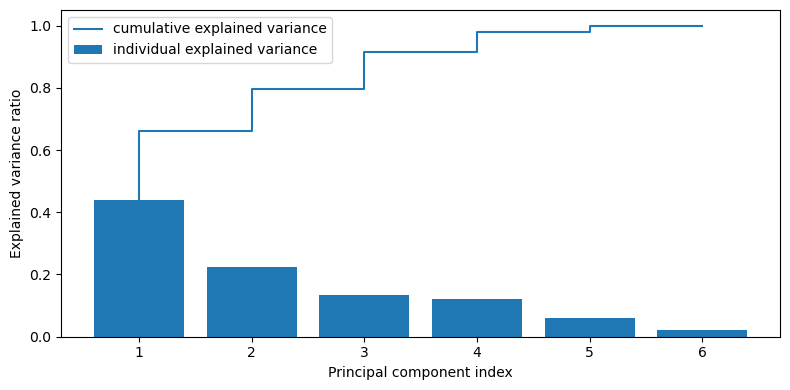

In [102]:

from sklearn.decomposition import PCA

# Initialize PCA and fit the scaled data to it
pca = PCA()
principalComponents = pca.fit_transform(features_scaled_df)

# Create a DataFrame with the principal components
newdf = pd.DataFrame(data=principalComponents)

# Show the variance ratio of the PCA components
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variances
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label='individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [11]:
explained_variance_ratio

array([0.43803225, 0.22342186, 0.13423252, 0.12088265, 0.06171581,
       0.02171491])

In [103]:
newdf

,0,1,2,3,4,5
0,1.165681,0.044569,-0.625761,-0.222508,-1.042810,-0.109098
1,1.605263,0.214115,0.003585,0.166219,-0.868537,0.003459
2,1.962743,3.113187,-0.681903,3.718504,-0.450079,-0.725589
3,-1.139771,0.809796,0.604959,0.280978,0.449779,0.139216
4,0.385938,2.803698,-0.887505,1.478745,0.095510,-0.163274
...,...,...,...,...,...,...
394,0.175663,-0.160753,-0.705808,-0.458206,0.265741,0.204790
395,1.006501,3.631252,1.377853,-1.617182,-1.030533,1.404346
396,-1.883003,2.153227,-1.331322,-0.671932,0.408855,-0.407711
397,-0.940433,0.019389,-0.563790,0.980531,-0.028146,-0.064890


### PCA Analysis and Explained Variance
Principal Component Analysis (PCA) has been applied to the scaled features, and the explained variance ratio for each principal component is as follows:

The first principal component explains approximately 43.8% of the variance.

The second principal component accounts for about 22.3% of the variance.

The third explains around 13.4%, the fourth 12.1%, the fifth 6.2%, and the sixth 2.2%.

so, To capture more than 90% of the variance, we would consider using the first four principal components

In [104]:
newdf=newdf.iloc[:, :4]

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

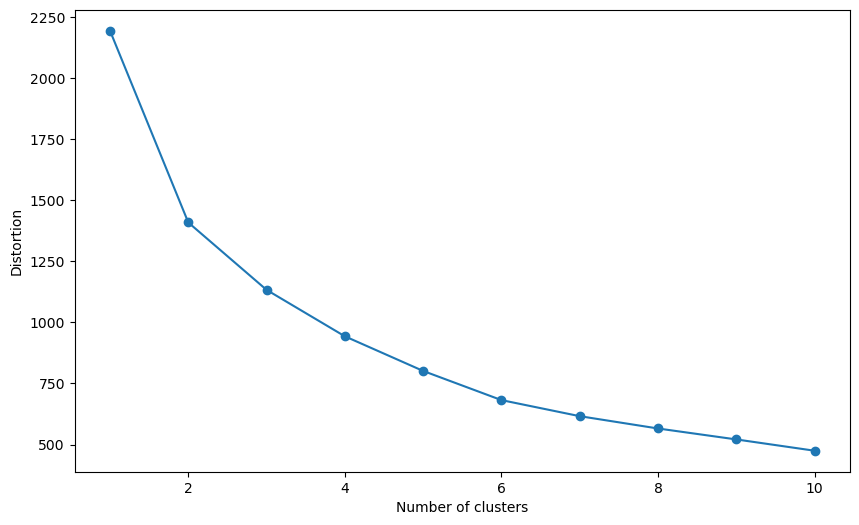

In [45]:
def plot_distortion(df, max_cluster=10):
    distortions = []  # Corrected variable name
    for i in range(1, max_cluster + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)  # Corrected parameter names
        km.fit(df)  # Added the dataset as an argument
        distortions.append(km.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortions, marker='o')  # Corrected variable name
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
plot_distortion(newdf)

#### it seems that the distortion (within-cluster sum of squares) decreases significantly and then the rate of decrease slows down after around 3 clusters. This suggests that the elbow is at 3 clusters

#### Visual Interpretation: We are limited to visualizing in two or three dimensions easily on a flat computer screen or paper. The first two principal components are the easiest to plot and interpret visually as they often contain the most variance (information) after dimensionality reduction, and can often give a good impression of the data structure.

#### As there are three clusters and there are three values in Region as you can see below, let's see if the clusters match with the regions

In [128]:
a=channels_regions['Region']

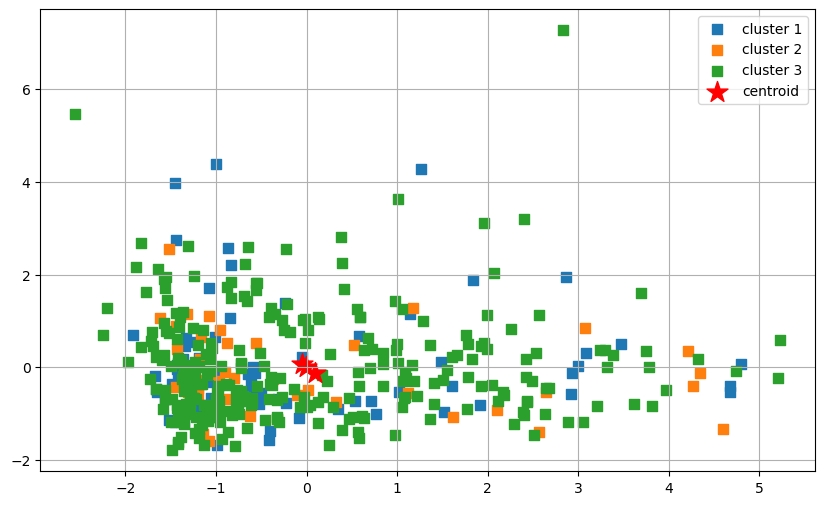

In [129]:
def plot_cluster(df, cluster_labels, plt_cluster_center=True):
    plt.figure(figsize=(10, 6))
    X_centroid = []
    Y_centroid = []
    
    for cluster in set(cluster_labels):
        x = df.iloc[cluster_labels == cluster, 0]
        y = df.iloc[cluster_labels == cluster, 1]
        X_centroid.append(np.mean(x))
        Y_centroid.append(np.mean(y))

        plt.scatter(x, y, s=50, marker='s', label=f'cluster {cluster}')

    if plt_cluster_center:
        plt.scatter(X_centroid, Y_centroid, marker='*', c='red', s=250, label='centroid') 
    plt.legend()
    plt.grid()
    plt.show()

plot_cluster(newdf, a.values, plt_cluster_center=True)


#### As we can see above it is not as we expected so those clusters that are created doesnt go along with the Region, so let's get a new measurement by using the following code

In [130]:
km = KMeans(n_clusters=3, n_init=10, random_state=0).fit(newdf[[0,1]])
y_pred=km.predict(newdf[[0,1]])

C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


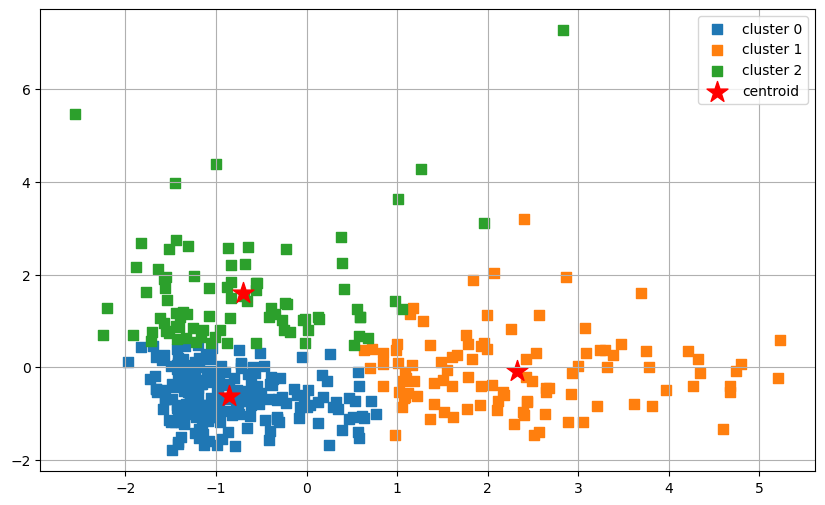

In [131]:
plot_cluster(newdf, y_pred, plt_cluster_center=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [68]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
def plot_dendogram(X, method='ward'):
    plt.figure(figsize=(10, 6))
    dendogram=sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

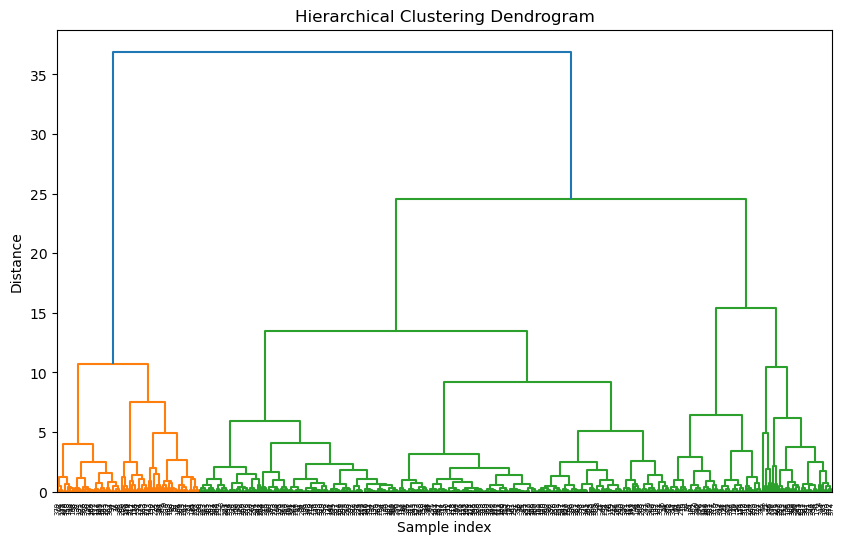

In [84]:
plot_dendogram(newdf[[0, 1]])

so, we can see from the above diagram as the number of clusters is three so we will segment the data into the three number of clusters.

In [86]:
hc=AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc=hc.fit_predict(newdf[[0,1]])

In [87]:
def plot_cluster_hierarchical(df, y_hc):
    for cluster in set(y_hc):
        x=df.iloc[y_hc==cluster, 0]
        y=df.iloc[y_hc==cluster, 1]
        
        plt.scatter(x, y, s=50, marker='s', label=f'cluster {cluster}')
    plt.show()

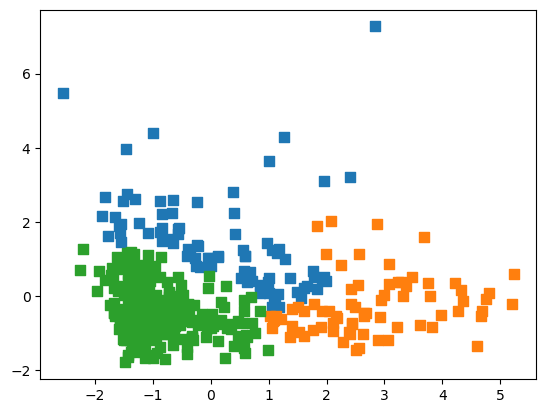

In [89]:
plot_cluster_hierarchical(newdf[[0,1]], y_hc)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

##### As we've already applied PCA, we can summarize its outcome. The first four principal components were used to capture the majority of the variance within the dataset, which allowed for more efficient and insightful clustering as we can see in the above sections. now let's try new things which is analyzing these principal components to understand the underlying structure of the wholesale customer data and to identify which combinations of features best describe the customers

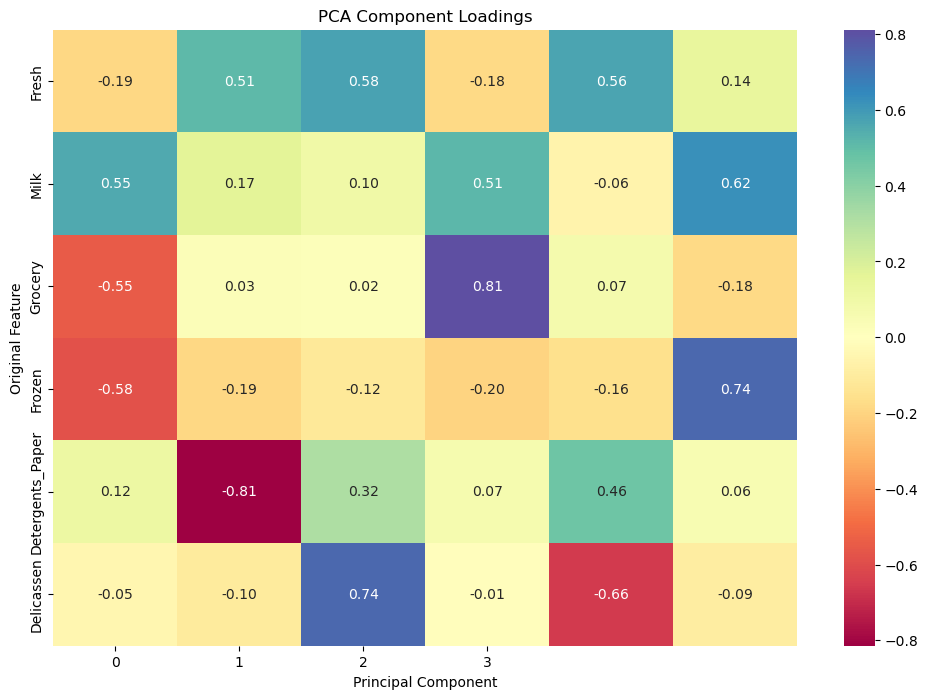

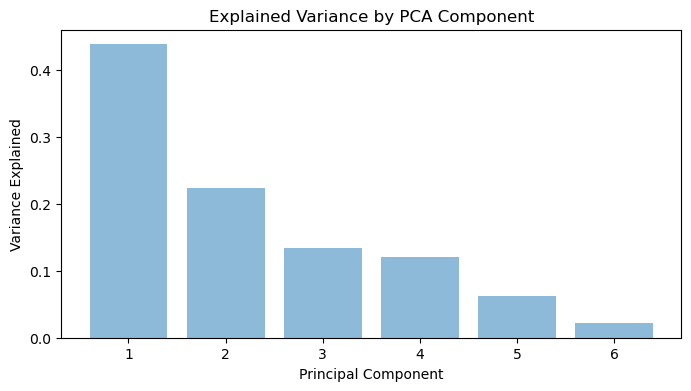

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features_scaled_df' is your standardized original features DataFrame

# Calculate the PCA loadings (i.e., the contribution of each original feature to each principal component)
loadings = pca.components_

# Visualize the importance of each feature on each component
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='Spectral', fmt=".2f", xticklabels=newdf.columns, yticklabels=features_scaled_df.columns)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Original Feature')
plt.show()

# Explained Variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.title('Explained Variance by PCA Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


# Part V - Conclusion

##### PCA identified that a few key components explain most of the variance in spending, suggesting that customers' purchasing behaviors can be captured effectively with a reduced set of variables.From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### EDA revealed skewed distributions across product categories, indicating a mix of heavy and light spenders, with some customers making significant purchases in categories like 'Fresh', 'Milk', and 'Grocery'. We were able to discover different corrrelations between the variables or attributes.

##### PCA identified that a few key components explain most of the variance in spending, suggesting that customers' purchasing behaviors can be captured effectively with a reduced set of variables and also we were able to do different pre processing steps to reach the PCA stage. 

##### KMeans clustering was then applied to segment the customers into three distinct groups. The Elbow method provided a clear indication of this optimal cluster number, with each group representing a unique spending profile. These clusters did not correspond with the geographic region, according to our analysis, indicating that the spending patterns of the customers were location-independent.

##### Hierarchical clustering further validated the segmentation, providing a dendrogram that supported the choice of three clusters. The clusters visualized through both methods showed clear separation, underscoring the distinct nature of each customer segment identified.



##### By understanding the unique characteristics of each cluster, the distributor can optimize its product offerings, enhance customer satisfaction, and drive business growth. The insights yielded practical information that could guide customer engagement initiatives, inventory management, and targeted advertising campaigns. 